In [5]:
import json
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

## 인공위성에서 찍은 비행기 사진

In [3]:
f_plane = open("planesnet/planesnet/planesnet.json")
f_plane

<_io.TextIOWrapper name='planesnet/planesnet/planesnet.json' mode='r' encoding='cp949'>

In [4]:
plane_dataset = json.load(f_plane)
f_plane.close()

In [5]:
plane_dataset.keys()

dict_keys(['data', 'labels', 'locations', 'scene_ids'])

In [6]:
plane_x = np.array(plane_dataset['data']).astype('uint8')
plane_y = np.array(plane_dataset['labels']).astype('uint8')
# int8, int16, int32, int64, uint8 (0~255), uint16, uint32, uint64
# int8: 8비트로 정수를 표현(-128~127 범위 내 표현 가능)

In [7]:
plane_x.shape #20,20,3
plane_y.shape
plane_x = plane_x.reshape([-1,3,20,20]).transpose([0,2,3,1])
plane_x.shape

(32000, 20, 20, 3)

In [8]:
shuffle_index = np.arange(32000)
np.random.shuffle(shuffle_index)

In [9]:
plane_x = plane_x[shuffle_index]
plane_y = plane_y[shuffle_index]

In [10]:
#정규화
plane_x = plane_x/255.0

In [11]:
plane_x.nbytes #1536000000 -> 307200000

307200000

In [12]:
plane_classes = {0:'No Plane', 1:'Plane'}

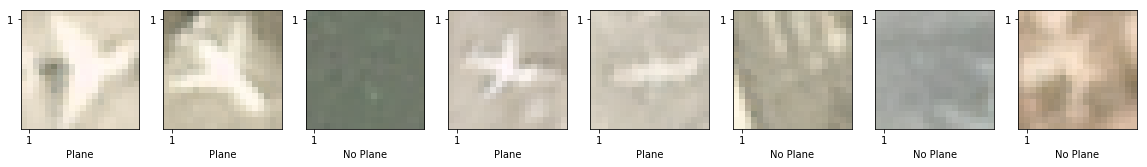

In [13]:
plt.figure(figsize=(20,10))
for i in range(8):
    plt.subplot(1,8,i+1)
    plt.xticks([1])
    plt.yticks([1])
    plt.imshow(plane_x[i], cmap=plt.cm.binary)
    plt.xlabel(plane_classes[plane_y[i]])

In [14]:
plane_x_train, plane_x_test, plane_y_train, plane_y_test = train_test_split(plane_x, plane_y, test_size=0.2)

In [15]:
#모델
def cnn_model(inputshape):
    model= tf.keras.Sequential([
        keras.layers.Conv2D(32,(5,5), input_shape=inputshape, activation='relu', padding='same'),
        keras.layers.Conv2D(64,(5,5), activation='relu'),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Dropout(0.25),
        
        keras.layers.Conv2D(128,(5,5), activation='relu'),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Dropout(0.25),
        keras.layers.Flatten(),
        
        keras.layers.Dense(512, activation='relu'),
        keras.layers.Dropout(0.35),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(0.35),
        keras.layers.Dense(2, activation='softmax')

    ])
    model.summary()
    return(model)

In [16]:
training_plane = cnn_model((20,20,3))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 20, 20, 32)        2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        51264     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         204928    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________

In [17]:
import os
checkpoint_path1 = 'cp.ckpt'
checkpoint_dir1 = os.path.dirname(checkpoint_path1)

In [18]:
cp_callback1 =tf.keras.callbacks.ModelCheckpoint(checkpoint_path1, save_weights_only=True, verbose=1)

In [19]:
training_plane.compile(optimizer=tf.keras.optimizers.Adam(), 
                       loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [20]:
import time

In [ ]:
start_time_plane = time.time() #현재 시간을 나타내는 함수 => 트레이닝 전,후 시간 측정

training_plane = training_plane.fit(plane_x_train, plane_y_train, validation_split=0.33, epochs=30, 
                                    callbacks=[cp_callback1], batch_size=256)

training_time = time.time()-start_time_plane

"""
model.fit(.... validation_data(xVal,yVal))

validation_split=0.33
xTrain, yTrain을 33% 분리하여 검증 데이터로 사용
"""

Train on 17152 samples, validate on 8448 samples
Epoch 1/30
16896/17152 [============================>.] - ETA: 0s - loss: 0.5555 - acc: 0.7487
Epoch 00001: saving model to cp.ckpt
17152/17152 [==============================] - 22s 1ms/sample - loss: 0.5534 - acc: 0.7484 - val_loss: 0.3770 - val_acc: 0.7995
Epoch 2/30
16896/17152 [============================>.] - ETA: 0s - loss: 0.3713 - acc: 0.8161
Epoch 00002: saving model to cp.ckpt
17152/17152 [==============================] - 21s 1ms/sample - loss: 0.3703 - acc: 0.8167 - val_loss: 0.3245 - val_acc: 0.8442
Epoch 3/30
11008/17152 [==================>...........] - ETA: 6s - loss: 0.2831 - acc: 0.8789

In [ ]:
training_plane.evaluate(plane_x_test, plane_y_test)
classification_plane = training_plane.predict(plane_x_test)

In [ ]:
# loss, accuracy 그래프 작성
# x축, 

In [ ]:
"""
1.모델
e=LabelEncoder()
e.fit(ydata)
y=e.transform(ydata)

loss='mse', opt=adam,...

과적합 발생

2.
학습셋과 테스트셋 분리
ex) 데이터 100개

70개 학습용      30개 테스트용
70개 학습 -> 모델 -> 30개 테스트

3. 모델 저장/불러오기
from keras.models import load_model
저장 : model.save("mymodel.h5")
불러오기 : model=load_model("mymodel.h5")
    
4. k-fold cross validation
5 fold 교차 검증 : 데이터를 5개로 나눔
"""

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
sonar = pd.read_csv("sonar.csv")
sonar

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [8]:
ydata = sonar["R"]

In [9]:
e = LabelEncoder()
e.fit(ydata)
ydata = e.transform(ydata)

In [10]:
ydata = ydata.reshape(207,1)

In [11]:
xdata = sonar.loc[:,"0.0200":"0.0032"]

In [12]:
xdata = xdata.values

In [13]:
xdata.shape #(207, 60)
ydata.shape #(207, 1)

(207, 1)

In [14]:
#스케일링
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()
scaler.fit(xdata)
xdata = scaler.transform(xdata)

In [19]:
xtrain, xtest, ytrain, ytest = train_test_split(xdata, ydata, train_size=0.7, random_state=42)

In [ ]:
#신경망

In [20]:
x = tf.placeholder(tf.float32, shape=[None,60])
y = tf.placeholder(tf.float32, shape=[None,1])

w = tf.Variable(tf.random_normal([60,1]))
b = tf.Variable(tf.random_normal([1]))

In [21]:
hf = tf.nn.sigmoid(tf.matmul(x,w)+b)

In [22]:
cost = -tf.reduce_mean((y-1)*tf.log(hf-1)+y*tf.log(hf))

In [23]:
train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

In [24]:
prediction = tf.cast(hf>0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, y), dtype=tf.float32))

In [25]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        _, cv = sess.run([train, cost], feed_dict={x:xtrain, y:ytrain})
    
    sess.run(hf, feed_dict={x:xtest})
    print("정확도:", sess.run(accuracy, feed_dict={x:xtest, y:ytest}))

정확도: 0.5714286
